In [1]:
import os
import sys
import pprint

base_dir = 'C:\Documents\Thesis_ssd\MasterThesis-2.0'
os.chdir(base_dir)

from Classes.DataProcessing.LoadData import LoadData
from Classes.DataProcessing.BaselineHelperFunctions import BaselineHelperFunctions
from Classes.DataProcessing.DataHandler import DataHandler
from Classes.DataProcessing.DataGenerator import DataGenerator
from Classes.Modeling.Models import Models
from Classes.Modeling.RandomGridSearch import RandomGridSearch
from Classes.Modeling.CustomCallback import CustomCallback
from Classes.Scaling.ScalerFitter import ScalerFitter
from Classes.Scaling.MinMaxScalerFitter import MinMaxScalerFitter
from Classes.Scaling.StandardScalerFitter import StandardScalerFitter
import json

helper = BaselineHelperFunctions()
%load_ext tensorboard

In [2]:
num_classes = 2
loadData = LoadData(num_classes = 2, isBalanced = True)
shuffle = False
full_ds, train_ds, val_ds, test_ds = loadData.getDatasets(shuffle = shuffle)
handler = DataHandler()
pp = pprint.PrettyPrinter(indent=4)
helper = BaselineHelperFunctions()

In [3]:
hyper_grid = {
        "batch_size" : [8, 16, 32, 64, 128, 256],
        "epochs" : [50, 65, 70, 75, 80],
        "learning_rate" : [0.1, 0.01, 0.001, 0.0001, 0.00001],
        "optimizer" : ["adam", "rmsprop", "sgd"]
    }
model_grid = {
    "start_neurons" : [4,8,16, 32, 64, 128, 256, 512],
    "dropout_rate" : [0.5, 0.4, 0.3, 0.2, 0.1, 0.01, 0],
    "filters" : [11, 13, 15, 17, 19, 21, 23, 25],
    "kernel_size" : [3, 5, 7, 9, 11, 13],
    "padding" : ["same", "valid"],
    "l2_r" : [0.3, 0.2, 0.1, 0.01, 0.001, 0.0001],
    "l1_r" : [0.3, 0.2, 0.1, 0.01, 0.001, 0.0001],
    "activation" : ["relu", "sigmoid", "softmax", "tanh"],
    "output_layer_activation" : ["softmax", "sigmoid"]
}


model_nr = 5
test_mode = False
useScaler = True
detrend = False
useMinMax = False
n_picks = 40
use_tensorboard = False

randomGridSearch = RandomGridSearch(train_ds, val_ds, test_ds, model_nr, 
                                    test_mode, detrend, useScaler, useMinMax, n_picks, 
                                    hyper_grid = hyper_grid, model_grid = model_grid, 
                                    num_classes = num_classes,
                                    use_tensorboard = use_tensorboard)

In [4]:
def clear_tensorboard_dir():
    import os
    import shutil
    path = f"{base_dir}/Tensorboard_dir/fit"
    files = os.listdir(path)
    print(files)
    for f in files:
        shutil.rmtree(os.path.join(path,f))
clear_tensorboard_dir()
%tensorboard --logdir tensorboard_dir/fit

[]


Reusing TensorBoard on port 6006 (pid 4772), started 0:10:30 ago. (Use '!kill 4772' to kill it.)

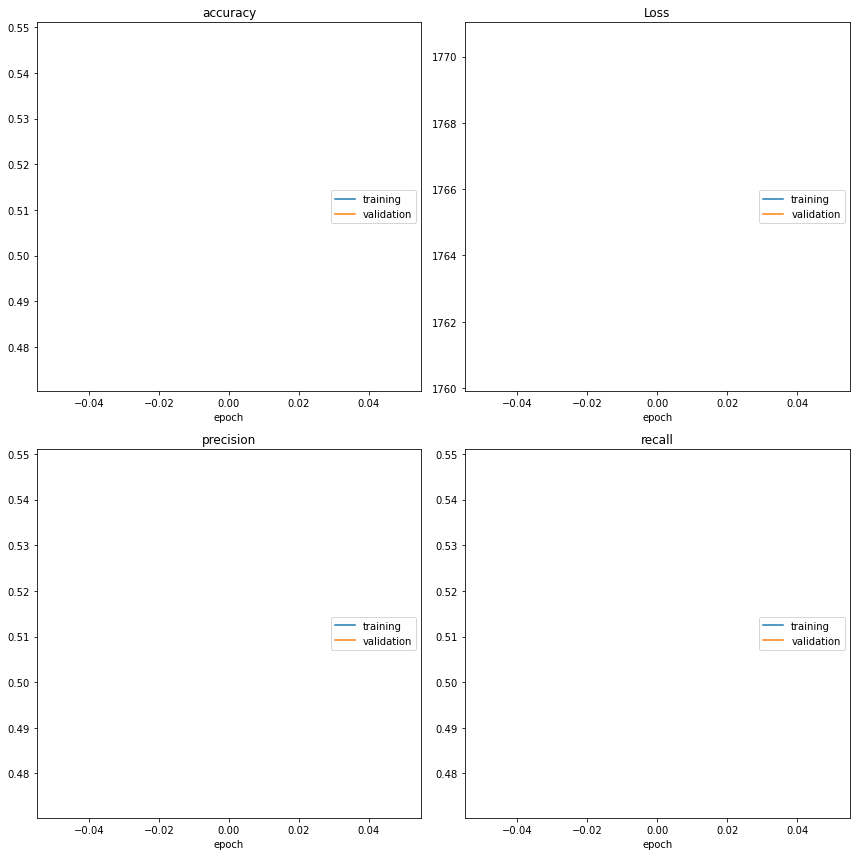

accuracy
	training         	 (min:    0.547, max:    0.547, cur:    0.547)
	validation       	 (min:    0.474, max:    0.474, cur:    0.474)
Loss
	training         	 (min: 1760.414, max: 1760.414, cur: 1760.414)
	validation       	 (min: 1770.523, max: 1770.523, cur: 1770.523)
precision
	training         	 (min:    0.547, max:    0.547, cur:    0.547)
	validation       	 (min:    0.474, max:    0.474, cur:    0.474)
recall
	training         	 (min:    0.547, max:    0.547, cur:    0.547)
	validation       	 (min:    0.474, max:    0.474, cur:    0.474)
1371/1370 [==============================] - 29s 21ms/step - loss: 1760.4136 - accuracy: 0.5474 - precision: 0.5474 - recall: 0.5474 - val_loss: 1770.5231 - val_accuracy: 0.4740 - val_precision: 0.4740 - val_recall: 0.4740
Epoch 2/70
 706/1370 [==============>...............] - ETA: 12s - loss: 1759.4858 - accuracy: 0.5372 - precision: 0.5372 - recall: 0.5372

In [ ]:
results, highest_test_accuracy_index, highest_train_accuracy_index, highest_test_precision_index, highest_test_recall_index= randomGridSearch.fit()

In [ ]:
dictionaries = randomGridSearch.read_results()
print(dictionaries)
use_tensorboard = True

**Highest test accuracy**

In [ ]:
model_test_accuracy = randomGridSearch.fit_from_result(dictionaries, highest_test_accuracy_index, use_tensorboard = use_tensorboard)

**Highest train accuracy**

In [ ]:
model_train_accuracy = randomGridSearch.fit_from_result(dictionaries, highest_train_accuracy_index, use_tensorboard = use_tensorboard)

**Highest precision**

In [ ]:
model_test_precision = randomGridSearch.fit_from_result(dictionaries, highest_test_precision_index, use_tensorboard = use_tensorboard)

**Highest recall**

In [ ]:
model_test_recall = randomGridSearch.fit_from_result(dictionaries, highest_test_recall_index, use_tensorboard = use_tensorboard)